In [73]:
from utils import *
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

In [74]:
# generate sample object
N = 4096
setup = {
    'N': N*2,
    'L': 1e-3, # 1mm
    'lambda_0': 650e-9, # 650nm, red light
    'f1': 45e-3, # 45mm
    'f2': 25e-3, # 25mm
    'A': 5e-3, # 5mm
    'plot': True
}
n = setup['N']
sample_size = 1024
sample = test_sum(sample_size, a=255, n_cycles=50, sigma=0.1)
field = np.zeros(n)
field[N//2-sample_size//2:N//2+sample_size//2] = sample

Output field length: 0.999718309859155mm


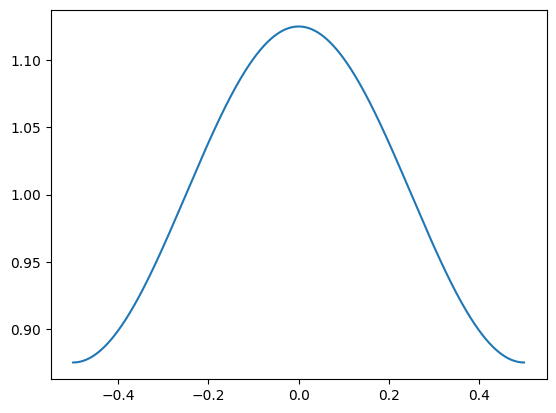

In [75]:
L = 213e-3 # field length in meters
w = 0.1e-3 # diameter of the LED in meters (gaussian width)
lambda_0 = 650e-9 # wavelength in meters
z = 0.08 # distance from LED to sample in meters
w_samples = int((w / L) * N) # number of samples for the gaussian width

x = np.arange(-N/2, N/2) # coordinates in samples
x_mm = (x * L / N)*1000 # coordinates in mm
source = gauss_1d_fwhm(x, N/4, w_samples) # gaussian source

# compute coordinates for sample field
kx = np.fft.fftfreq(N, d=L/N) # spatial frequencies
kx = np.fft.fftshift(kx)*lambda_0*z
kx_mm = kx*1000 # spatial frequencies in mm
output = fftshift(fft(source)) # compute the output field

L_o = np.max(kx) - np.min(kx) # output field length in meters
L_o_mm = L_o*1000 # output field length in mm
print('Output field length: {}mm'.format(L_o_mm))

plt.plot(kx_mm, np.abs(output))

Number of samples in sample field: 4096


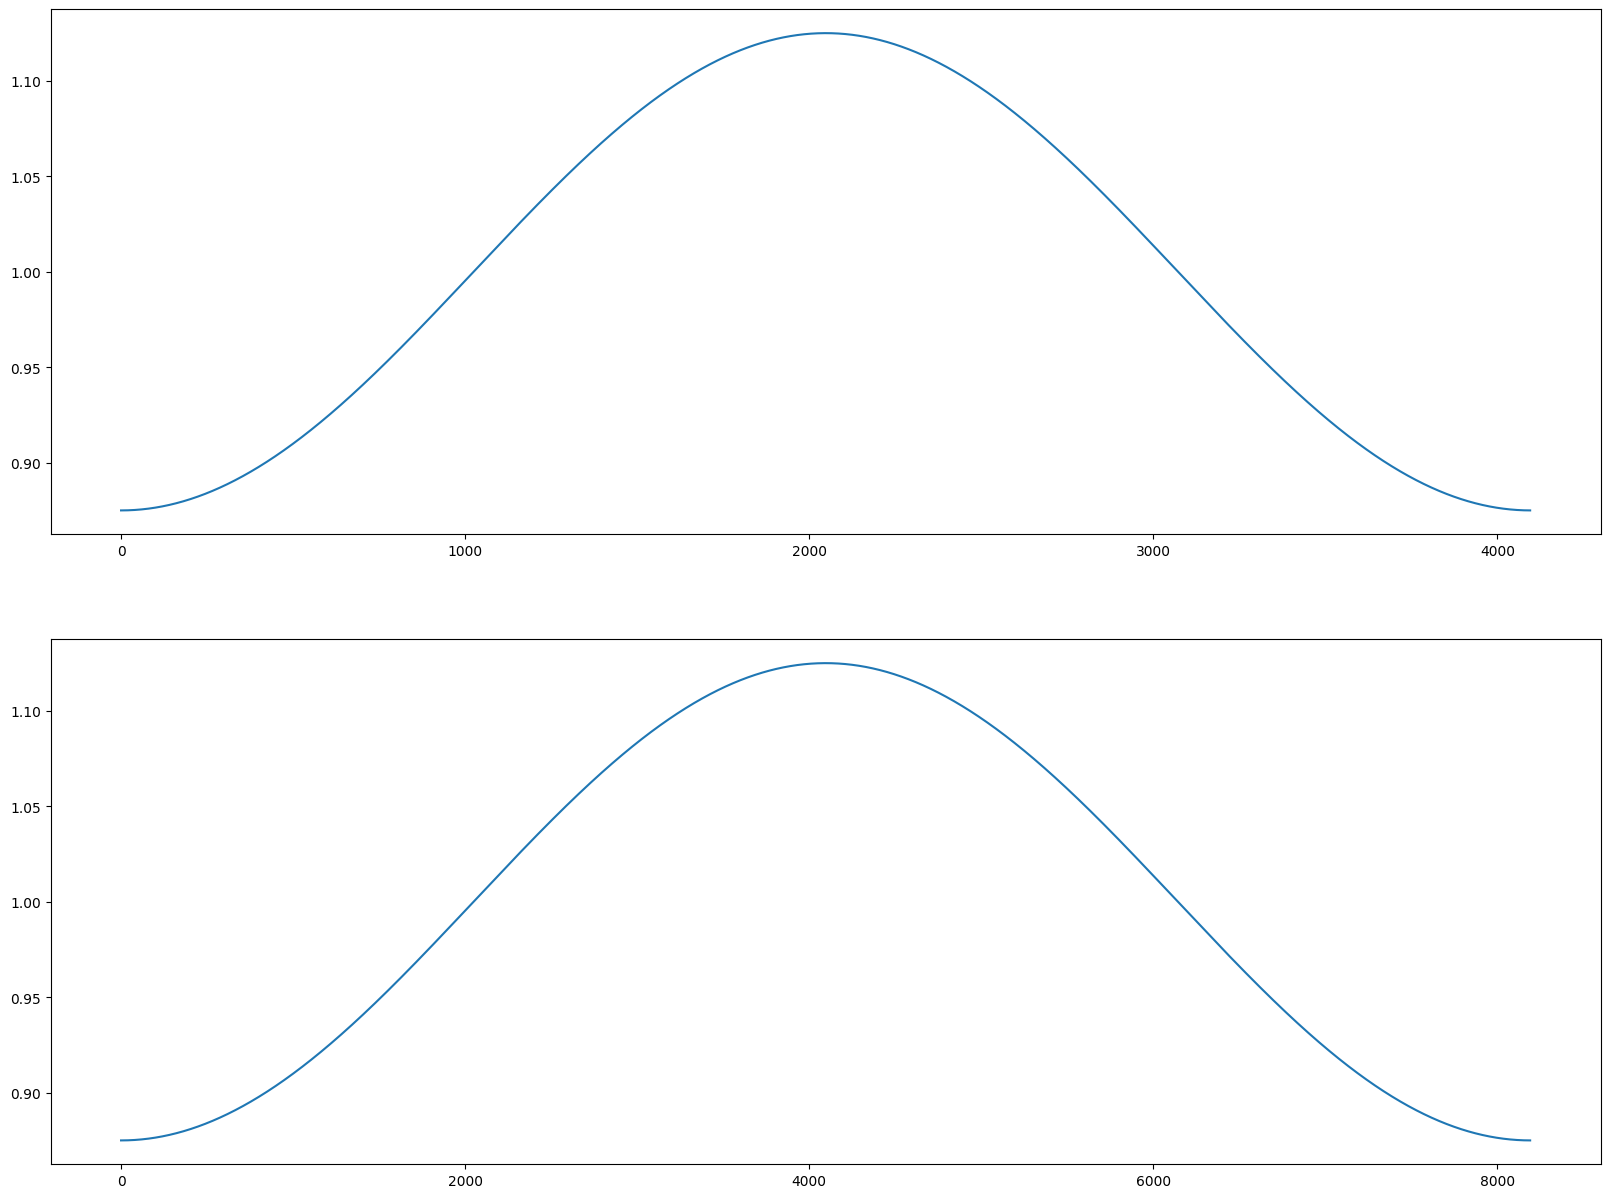

In [78]:
output_sample = np.asarray([output[i] for i in range(len(kx)) if kx[i] < setup['L']/2 and kx[i] > -setup['L']/2])
print('Number of samples in sample field: {}'.format(len(output_sample)))
sample_illumination = np.zeros(sample_size, dtype=np.complex128)
sample_illumination = signal.resample(output_sample, 8*sample_size)


_, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))
ax1.plot(np.abs(output_sample))
ax2.plot(np.abs(sample_illumination))

In [77]:
print(output_sample.shape)

(4096,)
